<a href="https://colab.research.google.com/github/forcoding1/Deep-Learning-with-tensorflow/blob/main/03_CNN_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import numpy as np
import pathlib as pl
import pandas as pd

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zi = zipfile.ZipFile("pizza_steak.zip")
zi.extractall()
zi.close()

--2023-01-15 12:07:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.8MB/s    in 5.5s    

2023-01-15 12:07:12 (19.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"{len(dirnames)} directories and {len(filenames)} images in {dirpath}")

2 directories and 0 images in pizza_steak
2 directories and 0 images in pizza_steak/test
0 directories and 250 images in pizza_steak/test/pizza
0 directories and 250 images in pizza_steak/test/steak
2 directories and 0 images in pizza_steak/train
0 directories and 750 images in pizza_steak/train/pizza
0 directories and 750 images in pizza_steak/train/steak


In [ ]:
train_images_num = len(os.listdir("pizza_steak/train/pizza"))
train_images_num

750

In [ ]:
data_dir = pl.Path("pizza_steak/train")
class_names = np.array(sorted([i.name for i in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as pmimg
import random 

def random_image_view(target_dir, target_class):
    target_folder = target_dir+target_class

    img_loc = random.sample(os.listdir(target_folder), 1)
    img = pmimg.imread(target_folder + "/" + img_loc[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"image shape: {img.shape}")

    return img

image shape: (512, 512, 3)


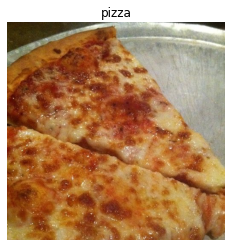

In [ ]:
img = random_image_view("pizza_steak/train/", "pizza")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_gen = ImageDataGenerator(rescale = 1./255)
val_gen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train/"
val_dir = "pizza_steak/test/"

train_data = train_gen.flow_from_directory(
    train_dir,
    batch_size = 32,
    target_size = (224,224),
    class_mode = "binary",
    seed = 42
)

val_data = val_gen.flow_from_directory(
    val_dir,
    batch_size = 32,
    target_size = (224,224),
    class_mode = "binary",
    seed = 42
)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size=3,
        activation="relu",
        input_shape = (224,224,3)
        ),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history = model.fit(
    train_data, epochs = 5, steps_per_epoch=len(train_data), validation_data=val_data, validation_steps=len(val_data)
)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 360ms/step - loss: 0.5904 - accuracy: 0.6793 - val_loss: 0.4289 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4207 - accuracy: 0.8107 - val_loss: 0.3343 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4061 - accuracy: 0.8193 - val_loss: 0.3418 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3743 - accuracy: 0.8433 - val_loss: 0.3210 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3198 - accuracy: 0.8627 - val_loss: 0.2886 - val_accuracy: 0.8820


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

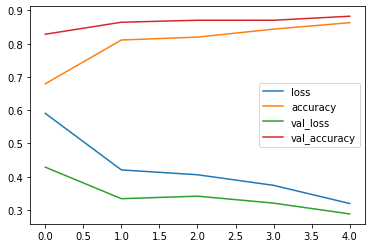

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Set the seed
# tf.random.set_seed(42)

# # Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
# train_datagen = ImageDataGenerator(rescale=1./255)
# valid_datagen = ImageDataGenerator(rescale=1./255)

# # Setup the train and test directories
# train_dir = "pizza_steak/train/"
# test_dir = "pizza_steak/test/"

# # Import data from directories and turn it into batches
# train_data = train_datagen.flow_from_directory(train_dir,
#                                                batch_size=32, # number of images to process at a time 
#                                                target_size=(224, 224), # convert all images to be 224 x 224
#                                                class_mode="binary", # type of problem we're working on
#                                                seed=42)

# valid_data = valid_datagen.flow_from_directory(test_dir,
#                                                batch_size=32,
#                                                target_size=(224, 224),
#                                                class_mode="binary",
#                                                seed=42)

# # Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
# model_1 = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(filters=10, 
#                          kernel_size=3, # can also be (3, 3)
#                          activation="relu", 
#                          input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
#   tf.keras.layers.Conv2D(10, 3, activation="relu"),
#   tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
#                             padding="valid"), # padding can also be 'same'
#   tf.keras.layers.Conv2D(10, 3, activation="relu"),
#   tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
#   tf.keras.layers.MaxPool2D(2),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
# ])

# # Compile the model
# model_1.compile(loss="binary_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# # Fit the model
# history_1 = model_1.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

In [ ]:
history.history

{'loss': [0.5904011726379395,
  0.4206770360469818,
  0.4061432182788849,
  0.37432801723480225,
  0.31983482837677],
 'accuracy': [0.6793333292007446,
  0.8106666803359985,
  0.8193333148956299,
  0.8433333039283752,
  0.862666666507721],
 'val_loss': [0.42892614006996155,
  0.33427026867866516,
  0.3418225347995758,
  0.3209726810455322,
  0.28855547308921814],
 'val_accuracy': [0.828000009059906,
  0.8640000224113464,
  0.8700000047683716,
  0.8700000047683716,
  0.8820000290870667]}

In [ ]:
def plot_loss_curve(history):
  val_loss = history.history["val_loss"]
  loss = history.history["loss"]

  accuracy = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize = (12, 5))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_acc, label="val_accuracy")
  plt.xlabel("epochs")
  plt.legend()


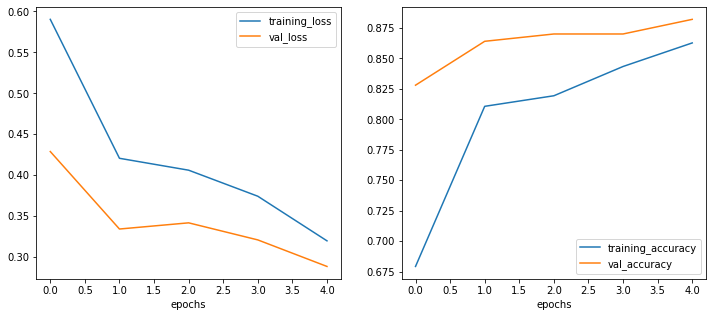

In [ ]:
plot_loss_curve(history = history)

In [ ]:
model_01 = Sequential([
    Conv2D(10, 3, padding = "valid", activation = "relu", input_shape = (224,224,3)),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
model_01.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_01.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
history_01 = model_01.fit(train_data, 
             epochs = 5, 
             steps_per_epoch=len(train_data), 
             validation_data=val_data, 
             validation_steps=len(val_data))

Epoch 1/5
47/47 [==============================] - 10s 208ms/step - loss: 1.5264 - accuracy: 0.6240 - val_loss: 0.4631 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4195 - accuracy: 0.8167 - val_loss: 0.3870 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3036 - accuracy: 0.8813 - val_loss: 0.3500 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.1858 - accuracy: 0.9367 - val_loss: 0.4067 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.1502 - accuracy: 0.9613 - val_loss: 0.3814 - val_accuracy: 0.8460


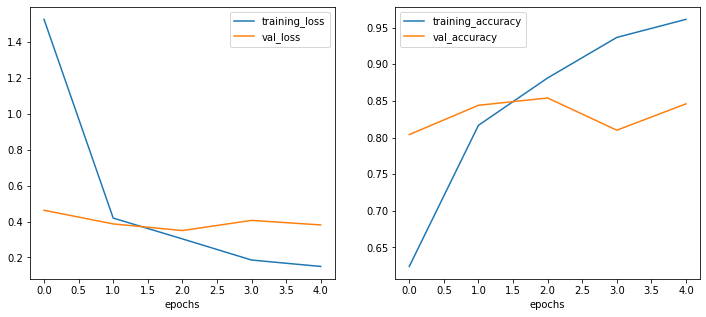

In [ ]:
plot_loss_curve(history_01)

In [ ]:
model_02 = Sequential([
    Conv2D(10, 3, padding = "valid", activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_02.compile(
    loss ="binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_02 = model_02.fit(
    train_data,
    epochs = 10,
    steps_per_epoch= len(train_data),
    validation_data =val_data,
    validation_steps = len(val_data)
    )

Epoch 1/10
47/47 [==============================] - 10s 200ms/step - loss: 0.6536 - accuracy: 0.6047 - val_loss: 0.5985 - val_accuracy: 0.6340
Epoch 2/10
47/47 [==============================] - 9s 194ms/step - loss: 0.4542 - accuracy: 0.7987 - val_loss: 0.4041 - val_accuracy: 0.8220
Epoch 3/10
47/47 [==============================] - 9s 196ms/step - loss: 0.3977 - accuracy: 0.8267 - val_loss: 0.3259 - val_accuracy: 0.8720
Epoch 4/10
47/47 [==============================] - 9s 191ms/step - loss: 0.3798 - accuracy: 0.8273 - val_loss: 0.3094 - val_accuracy: 0.8820
Epoch 5/10
47/47 [==============================] - 9s 194ms/step - loss: 0.3619 - accuracy: 0.8507 - val_loss: 0.3326 - val_accuracy: 0.8420
Epoch 6/10
47/47 [==============================] - 9s 198ms/step - loss: 0.3335 - accuracy: 0.8613 - val_loss: 0.3101 - val_accuracy: 0.8740
Epoch 7/10
47/47 [==============================] - 9s 196ms/step - loss: 0.3198 - accuracy: 0.8647 - val_loss: 0.3594 - val_accuracy: 0.8400
Epoch

In [ ]:
model_02.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

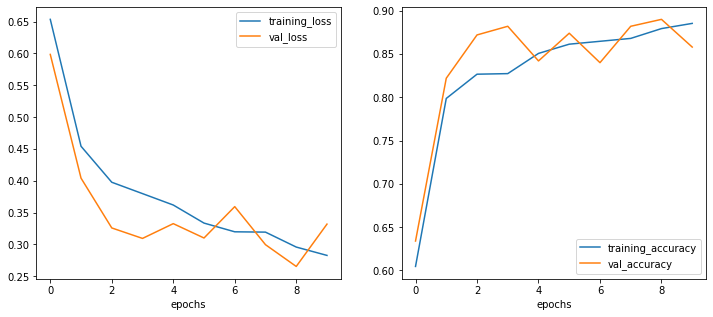

In [ ]:
plot_loss_curve(history_02)

In [ ]:
train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
    horizontal_flip = True
)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = False
)

train_data_aug = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = False
)

test_data = test_datagen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
images_aug, labels_aug = train_data_aug.next()

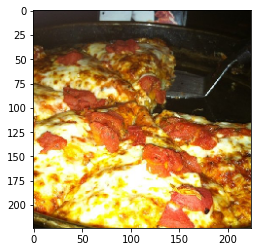

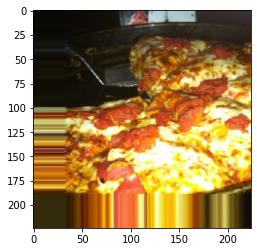

In [ ]:
r = random.randint(0, 31)

plt.figure()
plt.imshow(images[r])
plt.axis = False
plt.title = "original image"

plt.figure()
plt.imshow(images_aug[r])
plt.axis = False
plt.title = "augmented image"


In [ ]:
train_data_augmented_sh = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True
)

Found 1500 images belonging to 2 classes.


In [ ]:
model_03 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_03.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


In [ ]:
model_03.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

we have already beaten the baseline
Now we have to optimize our model and improve its accuracy

In [ ]:
history_03 = model_03.fit(
    train_data_augmented_sh,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented_sh),
    validation_data= test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 23s 486ms/step - loss: 0.6594 - accuracy: 0.5967 - val_loss: 0.5592 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5434 - accuracy: 0.7287 - val_loss: 0.4243 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 22s 471ms/step - loss: 0.4966 - accuracy: 0.7667 - val_loss: 0.4044 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 22s 478ms/step - loss: 0.4849 - accuracy: 0.7733 - val_loss: 0.3329 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 22s 474ms/step - loss: 0.4575 - accuracy: 0.7913 - val_loss: 0.3119 - val_accuracy: 0.8820


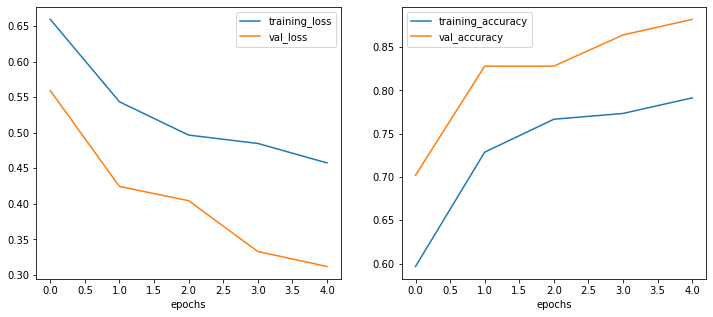

In [ ]:
plot_loss_curve(history_03)

In [ ]:
def load_prep_img(filename, img_shape = 224):
  #reads image
  img = tf.io.read_file(filename)
  #decodes it into a tensor
  img = tf.image.decode_image(img)
  #resize 
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #normalize
  img = img/255.

  return img

In [ ]:
names = ["pizza", "steak"]

In [ ]:
import matplotlib.pyplot as plt 

def pred_plot(model, filename, class_names = names):
  img = load_prep_img(filename)

  pred = model.predict(tf.expand_dims(img, axis = 0))

  pred_name = class_names[int(tf.round(pred[0][0]))]

  plt.figure()
  plt.imshow(img)
  plt.suptitle(f"predicted:{pred_name}")
  # plt.axis(False)


1/1 [==============================] - 0s 16ms/step


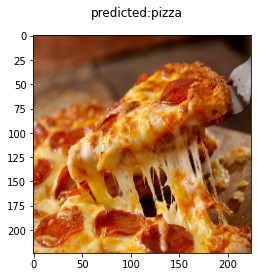

In [ ]:
pred_plot(model_03, "piz.jpg")